**NLP Analysis - Reviews Data**

# Introduction

## Read in libraries, data, and set notebook preferences

**Read in libraries**

In [1]:
#Read in libraries
import pandas as pd
import swifter

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

**Read in data**

In [2]:
#Set path to data
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Air BnB - SF\Data\03_Processed'

#Read in data
df = pd.read_csv(path + '/2020_0208_Reviews_Processed_NLP.csv',sep=',',
                 parse_dates=['date'])

**Set preferences for notebook**

In [3]:
#Ignore warnings
import warnings; warnings.simplefilter('ignore')

#Increase number of columns and rows displayed by Pandas
pd.set_option('display.max_colwidth',1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows',100)

#Set style for plots
plt.style.use('Solarize_Light2')

## Preview data

In [4]:
#Preview data and shape
print('Reviews data shape:', df.shape)
display(df.head())

Reviews data shape: (425509, 6)


,comments,date,sentiment_compound,label,word_count,comments_pos_tag
0,"Hello Josh Thank you very much for everything. I found myself very comfortable in your home. Quiet, comfortable and very complete and very clean, which I value highly. Next time I'd come with my family. I hope it's possible.",2013-12-01,0.9534,positive,39,"[('hello', 'NN'), ('josh', 'NN'), ('thank', 'VBD'), ('much', 'JJ'), ('everything', 'NN'), ('comfortable', 'JJ'), ('home', 'NN'), ('quiet', 'RBR'), ('comfortable', 'JJ'), ('complete', 'JJ'), ('clean', 'JJ'), ('highly', 'RB'), ('next', 'JJ'), ('time', 'NN'), ('come', 'VBN'), ('possible', 'JJ')]"
1,"Stop and book it now. Rea (Website hidden by Airbnb) this later!!! If your a single person looking for a story book San Francisco experience, look no farther. Staying in Mikes place couldn't be any more wonderful. If your familiar with ""Tales of the City"" Mike is the Olympia Dukakis. The home is warm and inviting with all the nuances of an old Victorian. Mike is an amazing host . He can tell you how walk drive or public transit the city (don't bother with a car). Would love to keep the gem to myself but everyone deserves this unique place to lay your head. Make sure while you're there be introduced to William . Book IT you won't be disappointed .",2017-06-07,0.9334,positive,122,"[('stop', 'VB'), ('book', 'NN'), ('rea', 'JJ'), ('website', 'RB'), ('hidden', 'VBP'), ('later', 'RB'), ('person', 'NN'), ('looking', 'VBG'), ('book', 'NN'), ('san', 'JJ'), ('francisco', 'JJ'), ('experience', 'NN'), ('look', 'NN'), ('staying', 'VBG'), ('place', 'NN'), ('wonderful', 'NN'), ('familiar', 'JJ'), ('tales', 'NNS'), ('city', 'NN'), ('mike', 'NN'), ('olympia', 'VBP'), ('dukakis', 'NN'), ('home', 'NN'), ('inviting', 'NN'), ('nuances', 'NNS'), ('old', 'JJ'), ('victorian', 'JJ'), ('mike', 'NN'), ('amazing', 'VBG'), ('host', 'NN'), ('tell', 'NN'), ('walk', 'VBP'), ('drive', 'JJ'), ('transit', 'NN'), ('city', 'NN'), ('would', 'MD'), ('love', 'VB'), ('gem', 'NN'), ('everyone', 'NN'), ('deserves', 'VBZ'), ('unique', 'JJ'), ('place', 'NN'), ('head', 'NN'), ('make', 'VBP'), ('sure', 'JJ'), ('book', 'NN'), ('disappointed', 'VBD')]"
2,"So I moved to SF in late May from Michigan to intern at Genentech for the summer. I stayed at Anjan’s apartment for 7 days while I was looking for a more permanent housing situation. Anjan was extremely hospitable and welcoming throughout the week. He was also very knowledgeable about the area and always offered to help in any way that he could. The area (SOMA) is very safe and is very “walkable.” There are plenty of restaurants and stores nearby (there’s even a target a few blocks away), so you have everything you need within a couple blocks from the apartment. As for the bedroom, it was spacious and clean. The bathroom was nice and I had to myself for the entirety of my stay. I felt very comfortable living at Anjan’s for a week and I really enjoyed staying there. If you’re a respectful person and are looking for a place to stay in SF for a short time, I highly recommend staying at Anjan’s. He’s a great person and a great host.",2013-06-02,0.9860,positive,175,"[('moved', 'VBN'), ('may', 'MD'), ('michigan', 'VB'), ('summer', 'NN'), ('days', 'NNS'), ('looking', 'VBG'), ('permanent', 'JJ'), ('housing', 'NN'), ('situation', 'NN'), ('anjan', 'VBZ'), ('extremely', 'RB'), ('hospitable', 'JJ'), ('welcoming', 'VBG'), ('throughout', 'IN'), ('week', 'NN'), ('also', 'RB'), ('knowledgeable', 'JJ'), ('area', 'NN'), ('always', 'RB'), ('offered', 'VBD'), ('way', 'NN'), ('area', 'NN'), ('soma', 'NN'), ('safe', 'JJ'), ('walkable', 'JJ'), ('plenty', 'NN'), ('stores', 'NNS'), ('nearby', 'JJ'), ('blocks', 'NNS'), ('away', 'RP'), ('everything', 'NN'), ('need', 'NN'), ('within', 'IN'), ('blocks', 'NNS'), ('apartment', 'JJ'), ('bedroom', 'NN'), ('spacious', 'JJ'), ('clean', 'JJ'), ('bathroom', 'NN'), ('nice', 'JJ'), ('entirety', 'NN'), ('stay', 'NN'), ('comfortable', 'JJ'), ('living', 'NN'), ('enjoyed', 'VBD'), ('staying', 'VBG'),

# Data Exploration

## Histogram of VADER sentiment scores

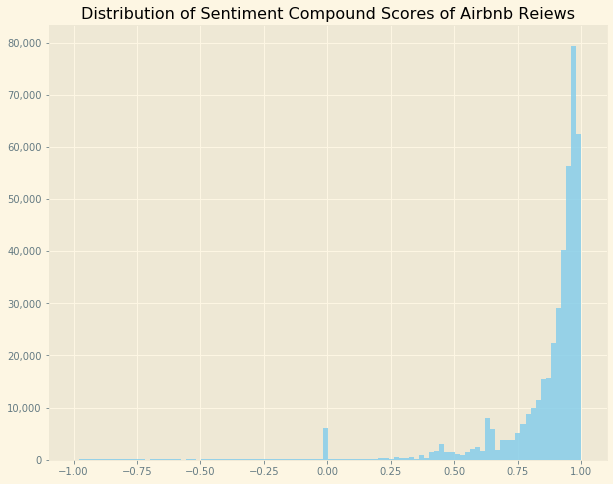

In [5]:
#Set plot
fig, ax = plt.subplots(figsize = (10,8))

#Plot hist of sentiment_compound scores
j = df.sentiment_compound.hist(ax = ax,bins = 100, color = 'skyblue', alpha = .85)

#Set plot aesthetics
j.set_title('Distribution of Sentiment Compound Scores of Airbnb Reiews')
ax.set_yticklabels(['{:,}'.format(int(y)) for y in ax.get_yticks()]);

## Positive, neutral, and negative review label counts

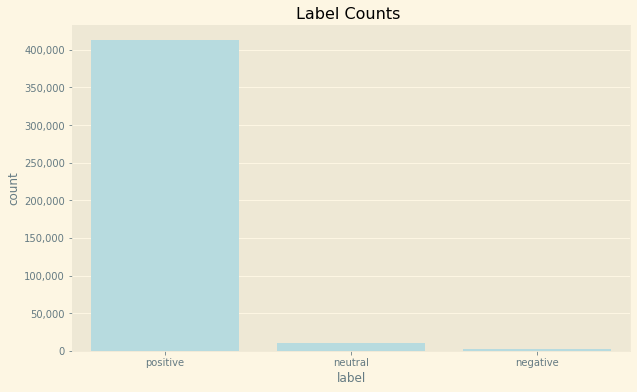

In [6]:
#Set plot
fig, ax = plt.subplots(figsize=(10,6))

#plot data
g =sns.countplot(x='label', data = df,order = ['positive', 'neutral', 'negative'], color='powderblue')

#Set plot aesthetics
g.set_title('Label Counts ')
g.set_yticklabels(['{:,}'.format(int(y)) for y in ax.get_yticks()]);

## Distribution of word counts for positive and negative reviews

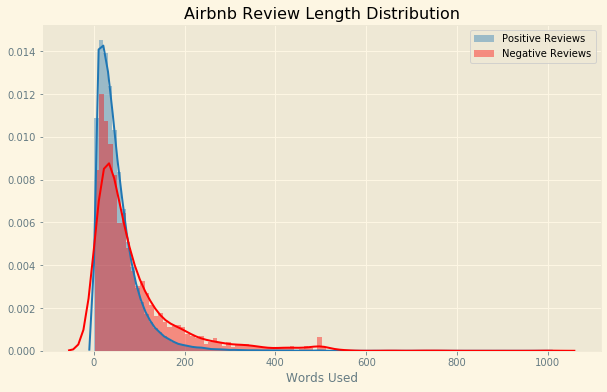

In [7]:
#Create pos/negative df's
pos_df = df[df.label == 'positive']
neg_df = df[df.label == 'negative']

#Create pos/neg corpora
pos_comments = pos_df['comments'].tolist()
neg_comments = neg_df['comments'].tolist()

#Set plot
fig, ax = plt.subplots(figsize=(10,6))

#Plot Histograms for word count
sns.distplot(pos_df.word_count, kde = True, bins = 100, color = 'tab:blue', ax=ax)
sns.distplot(neg_df.word_count, kde = True, bins = 100, color = 'r', ax=ax)

#Set plot aesthetics
ax.legend(labels = ['Positive Reviews', 'Negative Reviews', 'Neutral Reviews'], frameon = True);
ax.set_title('Airbnb Review Length Distribution')
ax.set_xlabel('Words Used');

## Word clouds and frequency counts of positive and negative reviews

In [8]:
#Import libraries 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

### Postive Reviews 

**WordCloud**

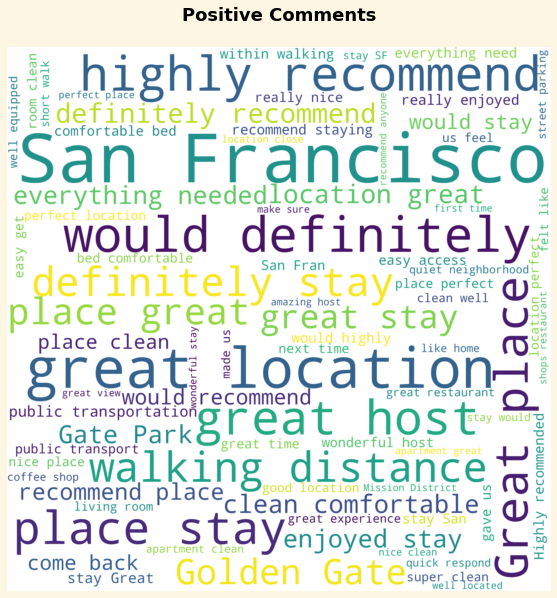

In [9]:
#Import stopwords
from nltk.corpus import stopwords, wordnet
stop_words = stopwords.words('english')

#Add additional stop words
stop_words.extend(['airbnb','website hidden by airbnb'])

#Create wordcloud for postive reviews
wordcloud = WordCloud(max_font_size=500, max_words=80, background_color="white", stopwords=stop_words,
                      width= 4000, height = 4000).generate(str(pos_comments))

#Plot data and set plot aesthetics
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.title('Positive Comments\n', fontsize=18, fontweight='bold')
plt.show()

**Positive Word Frequency Distributions**

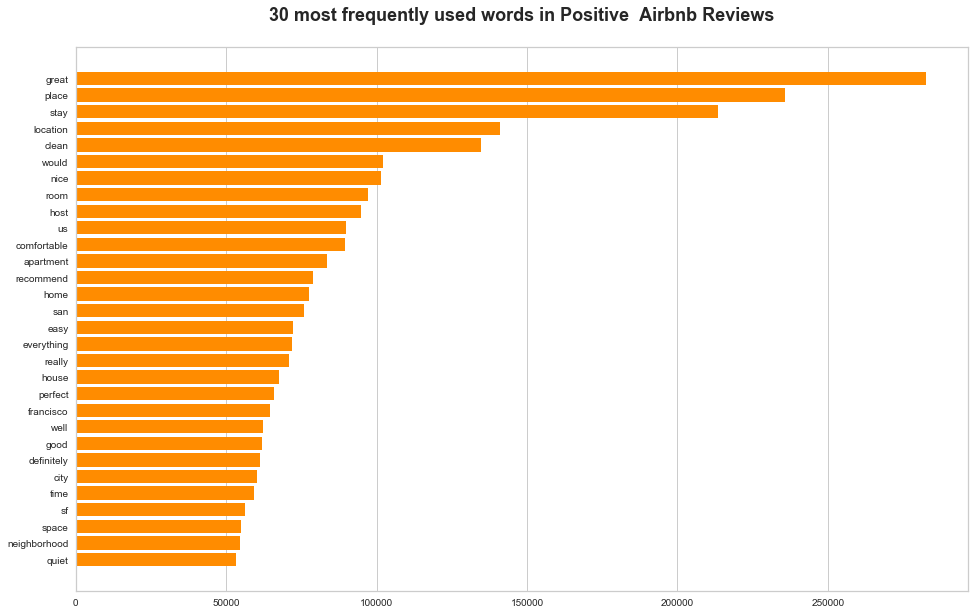

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text.freqdist import FreqDistVisualizer

#Vectorize comments and also remove stop words
cv = CountVectorizer(stop_words=stop_words)
positive_docs = cv.fit_transform(pos_comments)
features = cv.get_feature_names()

#Preparing the plot
plt.figure(figsize=(16,10))
plt.title('30 most frequently used words in Positive  Airbnb Reviews\n', fontsize = 18, fontweight='bold')

# instantiating and fitting the FreqDistVisualizer, plotting the top 30 most frequent terms
visualizer = FreqDistVisualizer(features=features, n=30, orient='h', color = 'darkorange')
visualizer.fit(positive_docs)
visualizer.poof;

### Negative Reviews

**WordCloud**

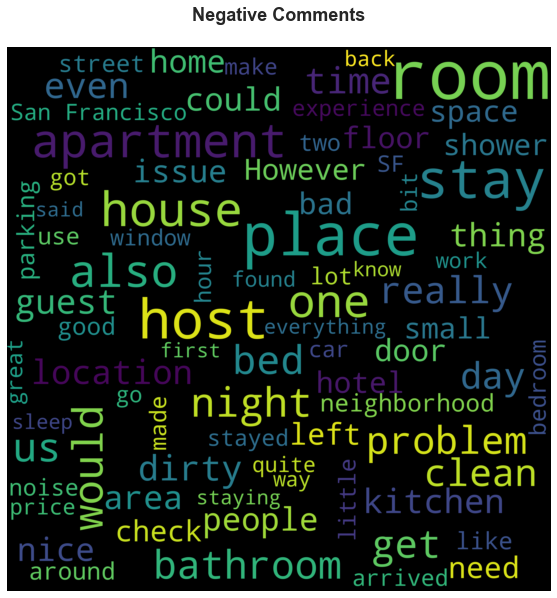

In [11]:
#Create wordcloud for postive reviews
wordcloud = WordCloud(max_font_size=500, max_words=80, background_color="black",stopwords=stop_words,
                      width= 4000, height = 4000).generate(str(neg_comments))

#Plot data and set plot aesthetics
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.title('Negative Comments\n', fontsize=18, fontweight='bold')
plt.show()

**Negative Word Frequency Distributions**

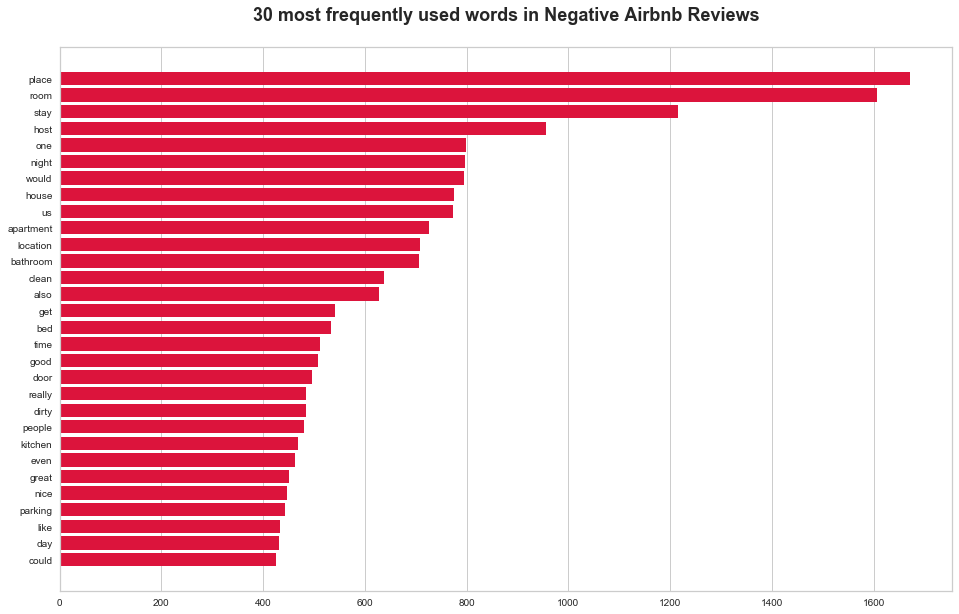

In [12]:
#Vectorize comments and also remove stop words
cv = CountVectorizer(stop_words=stop_words)
negative_docs = cv.fit_transform(neg_comments)
features = cv.get_feature_names()

#Preparing the plot
plt.figure(figsize=(16,10))
plt.title('30 most frequently used words in Negative Airbnb Reviews\n', fontsize = 18, fontweight='bold')

# instantiating and fitting the FreqDistVisualizer, plotting the top 30 most frequent terms
visualizer = FreqDistVisualizer(features=features, n=30, orient='h',color='crimson')
visualizer.fit(negative_docs)
visualizer.poof;

# Topic Modeling for Positive Reviews

Topic modeling will be performed seperately for positive and negative reviews due to the fact that a large majority of the reviews are positive reviews. Additionally, due to the sheer number of reviews, we will focus our topic analysis on the most positive and negative user experiecnes in the data set

## Import libraries

In [13]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Import spacy for lemmatization
from spacy.lang.en import English
import spacy
import en_core_web_lg
nlp = en_core_web_lg.load()

#Reg exp
import re

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  
import matplotlib.pyplot as plt

## Data Preparation

In [14]:
#How many really negative and positive reviews are there?
print("Number of reviews with a sentiment score < -.9: ",len(df[df.sentiment_compound < -.9]))
print("Number of reviews with a sentiment score > .9: ",len(df[df.sentiment_compound>.9]))

#Subset all negative reviews < -.9
neg_reviews = df[df.sentiment_compound < -.9]

#Subset 10% of all positive reviews > .9 
pos_reviews = df[df.sentiment_compound >.9][::10]

#Update pos/neg corpora
pos_comments = pos_reviews['comments'].tolist()
neg_comments = neg_reviews['comments'].tolist()

Number of reviews with a sentiment score < -.9:  315
Number of reviews with a sentiment score > .9:  266560


### Functions for data cleaning and tokenization

In [15]:
#Tokenize each sentence into a list of words and remove punctuation
def tokenizer(raw_reviews):
    for review in raw_reviews:
        yield(gensim.utils.simple_preprocess(review, deacc=True))
        
#Remove stopwords
def remove_stopwords(texts):
    texts = [texts.remove(text) if len(text) <3 else text for text in texts] #remove texts with len <3
    texts = [text for text in texts if text] #Remove None from texts
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

### Tokenize a comments

In [16]:
#Tokenize pos_comments and remove puncuation
pos_tokens = list(tokenizer(pos_comments))

#Check
print(pos_tokens[0])

['hello', 'josh', 'thank', 'you', 'very', 'much', 'for', 'everything', 'found', 'myself', 'very', 'comfortable', 'in', 'your', 'home', 'quiet', 'comfortable', 'and', 'very', 'complete', 'and', 'very', 'clean', 'which', 'value', 'highly', 'next', 'time', 'come', 'with', 'my', 'family', 'hope', 'it', 'possible']


**Creating Bigram and Trigram Models**

In [17]:
#Build bigram and trigram models
bigram = gensim.models.Phrases(pos_tokens,min_count=5, threshold=100)#Might need to increse with full data set
trigram = gensim.models.Phrases(bigram[pos_tokens], threshold=100)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [18]:
#Check
print(pos_tokens[2])

['when', 'left', 'phil', 'yesterday', 'morning', 'at', 'west', 'portal', 'we', 'hugged', 'this', 'is', 'my', 'second', 'time', 'staying', 'with', 'phil', 'only', 'this', 'time', 'had', 'the', 'garden', 'suite', 'which', 'believe', 'he', 'was', 'creating', 'last', 'year', 'think', 'we', 'have', 'become', 'friends', 'maybe', 'an', 'odd', 'combo', 'jewish', 'bubbi', 'from', 'brooklyn', 'going', 'to', 'be', 'this', 'year', 'and', 'he', 'asian', 'american', 'and', 'much', 'much', 'younger', 'but', 'think', 'we', 're', 'friends', 'phil', 'warm', 'and', 'open', 'the', 'space', 'he', 'makes', 'in', 'his', 'home', 'is', 'one', 'he', 'has', 'in', 'his', 'heart', 'his', 'heart', 'embraces', 'nature', 'and', 'the', 'inner', 'space', 'he', 'creates', 'reflects', 'his', 'love', 'of', 'being', 'in', 'natural', 'environment', 'it', 'uses', 'light', 'and', 'shadow', 'wood', 'tones', 'and', 'clean', 'lines', 'to', 'provide', 'open', 'space', 'place', 'in', 'which', 'to', 'pause', 'and', 'find', 'serenit

In [19]:
print(trigram_mod[bigram_mod[pos_tokens[2]]])

['when', 'left', 'phil', 'yesterday', 'morning', 'at', 'west_portal', 'we', 'hugged', 'this', 'is', 'my', 'second', 'time', 'staying', 'with', 'phil', 'only', 'this', 'time', 'had', 'the', 'garden', 'suite', 'which', 'believe', 'he', 'was', 'creating', 'last', 'year', 'think', 'we', 'have', 'become', 'friends', 'maybe', 'an', 'odd', 'combo', 'jewish', 'bubbi', 'from', 'brooklyn', 'going', 'to', 'be', 'this', 'year', 'and', 'he', 'asian', 'american', 'and', 'much', 'much', 'younger', 'but', 'think', 'we', 're', 'friends', 'phil', 'warm', 'and', 'open', 'the', 'space', 'he', 'makes', 'in', 'his', 'home', 'is', 'one', 'he', 'has', 'in', 'his', 'heart', 'his', 'heart', 'embraces', 'nature', 'and', 'the', 'inner', 'space', 'he', 'creates', 'reflects', 'his', 'love', 'of', 'being', 'in', 'natural', 'environment', 'it', 'uses', 'light', 'and', 'shadow', 'wood', 'tones', 'and', 'clean', 'lines', 'to', 'provide', 'open', 'space', 'place', 'in', 'which', 'to', 'pause', 'and', 'find', 'serenity',

Remove stopwords, create trigrams, and lemmatize

In [20]:
#Remove stopwords from pos_tokens
pos_tokens_clean = remove_stopwords(pos_tokens)

#check
print(pos_tokens_clean[2])

['left', 'phil', 'yesterday', 'morning', 'west', 'portal', 'hugged', 'second', 'time', 'staying', 'phil', 'time', 'garden', 'suite', 'believe', 'creating', 'last', 'year', 'think', 'become', 'friends', 'maybe', 'odd', 'combo', 'jewish', 'bubbi', 'brooklyn', 'going', 'year', 'asian', 'american', 'much', 'much', 'younger', 'think', 'friends', 'phil', 'warm', 'open', 'space', 'makes', 'home', 'one', 'heart', 'heart', 'embraces', 'nature', 'inner', 'space', 'creates', 'reflects', 'love', 'natural', 'environment', 'uses', 'light', 'shadow', 'wood', 'tones', 'clean', 'lines', 'provide', 'open', 'space', 'place', 'pause', 'find', 'serenity', 'think', 'meditative', 'moment', 'woods', 'sunshine', 'utilitarian', 'nothing', 'omitted', 'serve', 'better', 'describe', 'allotted', 'space', 'slept', 'well', 'memory', 'foam', 'mattress', 'totally', 'comfortable', 'provided', 'everything', 'heart', 'could', 'desire', 'space', 'actually', 'lifted', 'mood', 'made', 'joyous', 'website', 'hidden', 'example'

In [21]:
#Create functions to create bi/trigrams.
def bigrams(tokens):
    return[bigram_mod[token] for token in tokens]

def trigrams(tokens):
    return[trigram_mod[bigram_mod[token]] for token in tokens]

In [22]:
trigrams = trigrams(pos_tokens_clean)

In [23]:
#check
print(trigrams[0:2])

[['hello', 'josh', 'thank', 'much', 'everything', 'found', 'comfortable', 'home', 'quiet', 'comfortable', 'complete', 'clean', 'value', 'highly', 'next', 'time', 'come', 'family', 'hope', 'possible'], ['would', 'like', 'walk', 'city', 'place', 'minute', 'walk', 'handful', 'good', 'places', 'see', 'eat', 'italian', 'district', 'comprises', 'north_beach', 'area', 'best', 'food', 'wife', 'ever', 'used', 'apartment', 'home', 'base', 'day', 'great', 'place', 'within', 'nice', 'proximity', 'able', 'come', 'back', 'regroup', 'head', 'dinner', 'next', 'excursion', 'given', 'day', 'studio', 'amenities', 'perfect', 'us', 'problems', 'space', 'issues', 'otherwise', 'looking', 'live', 'like', 'local', 'san', 'francisco', 'probably', 'best', 'area', 'equally', 'spaced', 'fishermans_wharf', 'financial_district', 'union_square', 'lombards', 'st', 'many', 'points', 'interest', 'walking', 'hill', 'way', 'home', 'dinner', 'would', 'usually', 'stop', 'one', 'bodega', 'grab', 'bottle', 'wine', 'nightcap',

In [24]:
lemmatized_text = []
def lemmatization(texts, pos_tags = ['NOUN', 'ADJ', 'VERB', 'ADV']):
 #   lemmatized_text = []
    for item in texts:
        doc = nlp(" ".join(item))
        lemmatized_text.append([token.lemma_ for token in doc if token.pos_ in pos_tags])
    return lemmatized_text

In [25]:
# Initialize spacy 'en' model keeping only tagger component 
nlp = spacy.load('en_core_web_lg', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(list(trigrams),pos_tags = ['NOUN', 'ADJ', 'VERB', 'ADV'])

In [26]:
#check
print((data_lemmatized[2]))

['leave', 'yesterday', 'morning', 'hug', 'second', 'time', 'stay', 'believe', 'create', 'last', 'year', 'think', 'become', 'friend', 'maybe', 'odd', 'combo', 'jewish', 'go', 'year', 'much', 'much', 'young', 'think', 'friend', 'open', 'space', 'make', 'home', 'heart', 'heart', 'embrace', 'nature', 'inner', 'space', 'create', 'reflect', 'love', 'natural', 'environment', 'use', 'light', 'shadow', 'wood', 'tone', 'clean', 'line', 'provide', 'open', 'space', 'place', 'pause', 'find', 'serenity', 'think', 'meditative', 'moment', 'wood', 'sunshine', 'utilitarian', 'omit', 'serve', 'better', 'describe', 'allot', 'space', 'sleep', 'well', 'memory_foam_mattress', 'totally', 'comfortable', 'provide', 'heart', 'could', 'desire', 'space', 'actually', 'lift', 'mood', 'make', 'joyous', 'website_hidden', 'example', 'bathroom', 'tile', 'cover', 'wall', 'contour', 'light', 'shadow', 'create', 'sensation', 'wave', 'shower', 'curtain', 'bubble', 'water', 'floor', 'sand', 'color', 'base', 'sink', 'color', 

Append lematized pos words to pos_df

In [27]:
#Assign lemmatized comments to pos_reviews df
pos_reviews['comments_lemmatized'] = data_lemmatized

#Check
pos_reviews.head(1)

,comments,date,sentiment_compound,label,word_count,comments_pos_tag,comments_lemmatized
0,"Hello Josh Thank you very much for everything. I found myself very comfortable in your home. Quiet, comfortable and very complete and very clean, which I value highly. Next time I'd come with my family. I hope it's possible.",2013-12-01,0.9534,positive,39,"[('hello', 'NN'), ('josh', 'NN'), ('thank', 'VBD'), ('much', 'JJ'), ('everything', 'NN'), ('comfortable', 'JJ'), ('home', 'NN'), ('quiet', 'RBR'), ('comfortable', 'JJ'), ('complete', 'JJ'), ('clean', 'JJ'), ('highly', 'RB'), ('next', 'JJ'), ('time', 'NN'), ('come', 'VBN'), ('possible', 'JJ')]","[thank, much, find, comfortable, home, quiet, comfortable, complete, clean, value, highly, next, time, come, family, hope, possible]"


## Bag of Words

In [28]:
dictionary = corpora.Dictionary(documents=data_lemmatized)
print(len(dictionary))

#Filter pos_lemmatized. Remove tokens that apppear in <15 documents and in more than 50% of the documents
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
bow_corpus = [dictionary.doc2bow(text) for text in data_lemmatized]


print('Number of unique words in dictionary for positive reviews:', len(dictionary))

#Preview Bag Of Words for our sample preprocessed document.
bow_doc_1 = bow_corpus[1]
for i in range(len(bow_doc_1)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_1[i][0], 
                                               dictionary[bow_doc_1[i][0]], bow_doc_1[i][1]))

10271
Number of unique words in dictionary for positive reviews: 2201
Word 1 ("come") appears 1 time.
Word 7 ("home") appears 2 time.
Word 10 ("next") appears 1 time.
Word 16 ("able") appears 1 time.
Word 17 ("amenity") appears 1 time.
Word 18 ("apartment") appears 2 time.
Word 19 ("area") appears 2 time.
Word 20 ("back") appears 1 time.
Word 21 ("base") appears 1 time.
Word 22 ("beat") appears 1 time.
Word 23 ("blue") appears 1 time.
Word 24 ("bottle") appears 1 time.
Word 25 ("city") appears 3 time.
Word 26 ("coit_tower") appears 1 time.
Word 27 ("cool") appears 1 time.
Word 28 ("day") appears 2 time.
Word 29 ("dinner") appears 2 time.
Word 30 ("district") appears 1 time.
Word 31 ("eat") appears 1 time.
Word 32 ("enough") appears 1 time.
Word 33 ("equally") appears 1 time.
Word 34 ("ever") appears 1 time.
Word 35 ("excursion") appears 1 time.
Word 36 ("fall") appears 1 time.
Word 37 ("feel") appears 1 time.
Word 38 ("financial_district") appears 1 time.
Word 39 ("food") appears 1 tim

TF-IDF

In [29]:
from gensim import models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

#check
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.08891953732722502),
 (1, 0.20466851962301957),
 (2, 0.22641770795396482),
 (3, 0.4456169960383482),
 (4, 0.24260422632405745),
 (5, 0.2228435336995377),
 (6, 0.17531692765187887),
 (7, 0.15086946471229892),
 (8, 0.30922901048817736),
 (9, 0.21423830207337963),
 (10, 0.241996064187727),
 (11, 0.4080216666427162),
 (12, 0.16640767053634428),
 (13, 0.16595658795314835),
 (14, 0.15160709843948253),
 (15, 0.30589007003652474)]


Optimal Number of topics based on optimal coherence score

In [93]:
def get_coherence_values(dictionary, corpus, texts, max_topics, start=2, step=3):
    """
    Compute the coherence score for different LDA models
    of different topic number
    ----------------------------------------------------
    PARAMETERS:
    - dictionary : Gensim dictionary
    - corpus : Gensim corpus
    - texts : List of input texts
    - limit : Max num of topics 
    """
    coherence_scores = []
    model_list = []
    for topics in range(start, max_topics, step):
        model = gensim.models.LdaMulticore(corpus = corpus, num_topics=topics,workers=3, id2word=dictionary, random_state=24)
        model_list.append(model)
        coherence_model = CoherenceModel(model = model, texts=texts, dictionary=dictionary)
        coherence_scores.append(coherence_model.get_coherence())
    return model_list, coherence_scores

In [94]:
models, scores = get_coherence_values(dictionary=dictionary, corpus=corpus_tfidf, 
                                                    texts=data_lemmatized, start=2, max_topics=20, step=2)


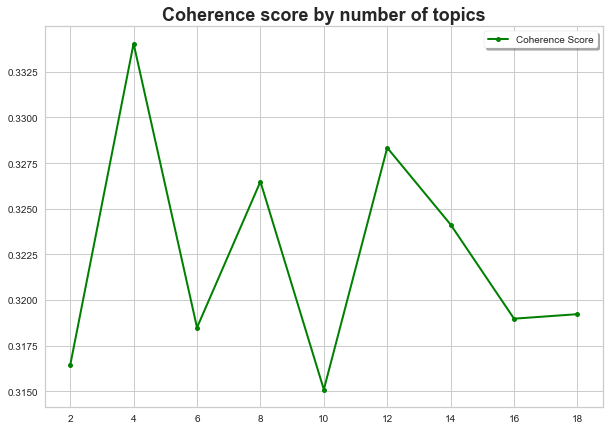

Coherence Score for LDA w/ 2 topics: 0.316
Coherence Score for LDA w/ 4 topics: 0.334
Coherence Score for LDA w/ 6 topics: 0.318
Coherence Score for LDA w/ 8 topics: 0.326
Coherence Score for LDA w/ 10 topics: 0.315
Coherence Score for LDA w/ 12 topics: 0.328
Coherence Score for LDA w/ 14 topics: 0.324
Coherence Score for LDA w/ 16 topics: 0.319
Coherence Score for LDA w/ 18 topics: 0.319


In [95]:
#Set range for xaxis
start=2; max_topics=20; step=2;
x= list(range(start, max_topics, step))

#Set plot size
plt.figure(figsize=(10,7))

#Plot coherence scores
plt.plot(x,scores, label = 'Coherence Score', color='green', marker='o', linestyle='-',
      linewidth=2, markersize=5, )

plt.title('Coherence score by number of topics', fontsize = 18, fontweight='bold')
plt.legend(frameon = True, shadow = True)
plt.show();

#Print coherence scores
for m, cv in zip(x, scores):
    print('Coherence Score for LDA w/', m,'topics:', round(cv,3))

Visualize Topics

Optimal model has 4 topics selected for our data

In [109]:
optimal_model = models[1]
model_topics = optimal_model.show_topics()

#Compute LDA model perplexity
print('Optimal LDA Model Perplexity: ', optimal_model.log_perplexity(corpus_tfidf))

#View topics
print('Optimal LDA Model Topics:')
display(optimal_model.print_topics())

Optimal LDA Model Perplexity:  -7.40099127351641


'hi'

[(0,
  '0.008*"nice" + 0.008*"room" + 0.008*"place" + 0.008*"clean" + 0.007*"good" + 0.007*"apartment" + 0.007*"location" + 0.006*"really" + 0.006*"helpful" + 0.006*"comfortable"'),
 (1,
  '0.007*"place" + 0.006*"city" + 0.006*"make" + 0.005*"room" + 0.005*"location" + 0.005*"host" + 0.005*"would" + 0.005*"comfortable" + 0.005*"perfect" + 0.005*"easy"'),
 (2,
  '0.009*"wonderful" + 0.008*"host" + 0.008*"location" + 0.007*"apartment" + 0.007*"love" + 0.007*"place" + 0.007*"would" + 0.007*"recommend" + 0.006*"clean" + 0.006*"restaurant"'),
 (3,
  '0.009*"place" + 0.008*"nice" + 0.008*"clean" + 0.007*"location" + 0.007*"home" + 0.007*"easy" + 0.007*"comfortable" + 0.007*"super" + 0.007*"host" + 0.007*"recommend"')]

In [107]:
#Create plot
pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim.prepare(optimal_model, corpus_tfidf, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.010640 -0.001565       1        1  26.660242
0     -0.013852 -0.024139       2        1  26.085415
3      0.023056  0.004483       3        1  24.233828
1     -0.019843  0.021221       4        1  23.020508, topic_info=              Term        Freq       Total Category  logprob  loglift
135      wonderful  598.000000  598.000000  Default  30.0000  30.0000
348      excellent  308.000000  308.000000  Default  29.0000  29.0000
399           view  402.000000  402.000000  Default  28.0000  28.0000
548     responsive  254.000000  254.000000  Default  27.0000  27.0000
139  accommodation  127.000000  127.000000  Default  26.0000  26.0000
..             ...         ...         ...      ...      ...      ...
311      beautiful  109.163139  534.124695   Topic4  -5.4388  -0.1190
187      recommend  111.436378  664.969788   Topic4  -5.4182  -0.3175
56            nice  112.923119  709.774841   Topic4  -5.4049  -0.3695
109           love  106.551529  579.008118   Topic4  -5.4630  -0.2239
42            good  107.057449  614.484741   Topic4  -5.4582  -0.2786

[372 rows x 6 columns], token_table=      Topic      Freq               Term
term                                    
16        1  0.233408               able
16        2  0.227979               able
16        3  0.206267               able
16        4  0.336541               able
1467      1  0.142982  absolute_pleasure
...     ...       ...                ...
81        4  0.193212              would
1563      1  0.110251           year_old
1563      2  0.661504           year_old
1563      3  0.147001           year_old
1563      4  0.110251           year_old

[933 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 4, 2])

Updated word cloud

Updated word frequencies